In [1]:
!pip3 install librosa

  Using cached librosa-0.10.2.post1-py3-none-any.whl.metadata (8.6 kB)
  Using cached audioread-3.0.1-py3-none-any.whl.metadata (8.4 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached soundfile-0.12.1-py2.py3-none-macosx_11_0_arm64.whl.metadata (14 kB)
  Using cached pooch-1.8.2-py3-none-any.whl.metadata (10 kB)
  Using cached lazy_loader-0.4-py3-none-any.whl.metadata (7.6 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached librosa-0.10.2.post1-py3-none-any.whl (260 kB)
Using cached audioread-3.0.1-py3-none-any.whl (23 kB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached lazy_loader-0.4-py3-none-any.whl (12 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 1.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 1.1 MB/s eta 0:00:00a 0:00:01
Using cached pooch-1.8.2-py3-none-any.whl (64 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 1.1 MB/s eta 0:00:0000:

In [20]:
!pip install numpy

In [16]:
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 1.1 MB/s eta 0:00:00a 0:00:01


In [2]:
!pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.1.4-py3-none-any.whl.metadata (5.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 1.1 MB/s eta 0:00:0000:0100:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 1.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 801.2 kB/s eta 0:00:00a 0:00:01
Using cached pyparsing-3.1.4-py3-none-any.whl (104 kB)


In [3]:
!pip install ffmpeg

  Using cached ffmpeg-1.4.tar.gz (5.1 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6082 sha256=0c4676641803f296d2fbb25c8c9b6ba13be57519fe178962cda7ac12e5515e74
  Stored in directory: /Users/polinanazarova/Library/Caches/pip/wheels/8e/7a/69/cd6aeb83b126a7f04cbe7c9d929028dc52a6e7d525ff56003a
Successfully built ffmpeg


In [1]:
import librosa
video_path = '/Users/polinanazarova/Desktop/fcb009f177116d100e67f88f57006190.mp4'
audio , sr = librosa.load(video_path)

/var/folders/2l/9ngbv0ln3bg2rcxscgv7604m0000gn/T/ipykernel_9059/356720622.py:3: UserWarning: PySoundFile failed. Trying audioread instead.
  audio , sr = librosa.load(video_path)
/Users/polinanazarova/anaconda3/envs/vseross2024/lib/python3.10/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


In [2]:
print(audio[100])

-1.4901161e-08


In [3]:
print(audio.shape, sr)

(36094461,) 22050


In [4]:
36094461/22050/60

27.282283446712018

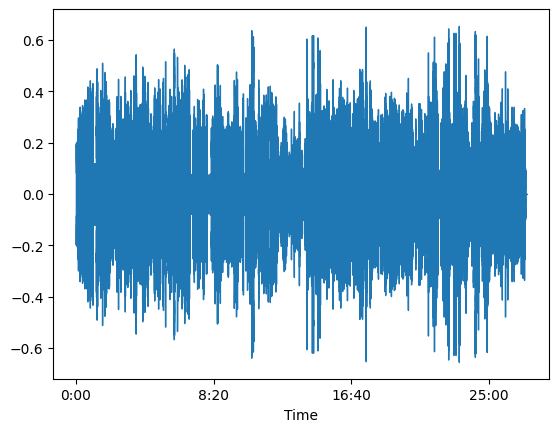

In [5]:
import matplotlib.pyplot as plt
import librosa.display
%matplotlib inline

librosa.display.waveshow(audio)
plt.show()

Звук можно перевести из временной области в частотную область с помощью быстрого преобразования Фурье таким образом, что после этого мы получим спектр сигнала. В librosa для этих целей есть функция librosa.stft() c такими параметрами как n_fft - длина оконного сигнала после заполнения нулями и hop_length - размер кадра или размер быстрого преобразования Фурье.

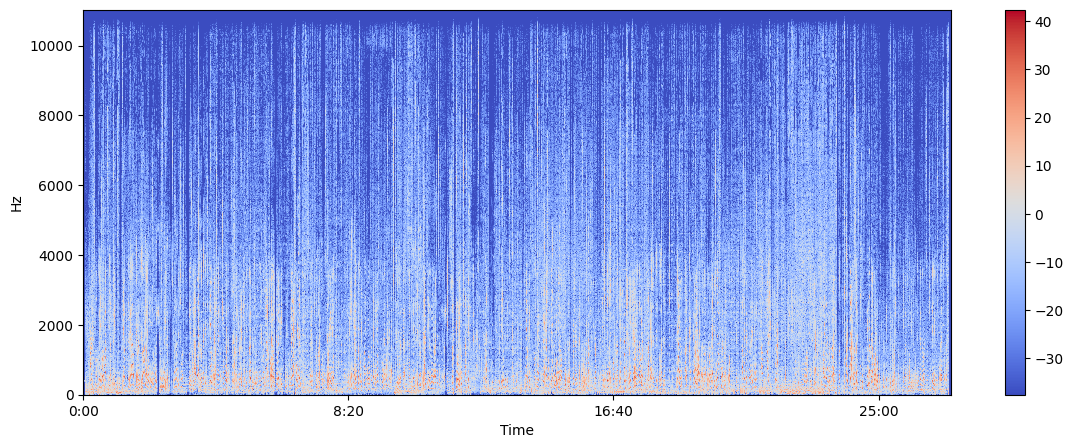

In [6]:
X = librosa.stft(audio)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()
plt.show()

Мел-кепстральные коэффициенты (MFCC) используются для анализа речевых данных.

Они позволяют выделить признаки, которые являются «хорошими» для идентификации лингвистического содержания, и отбросить все остальные признаки, отвечающие за шум и эмоции.

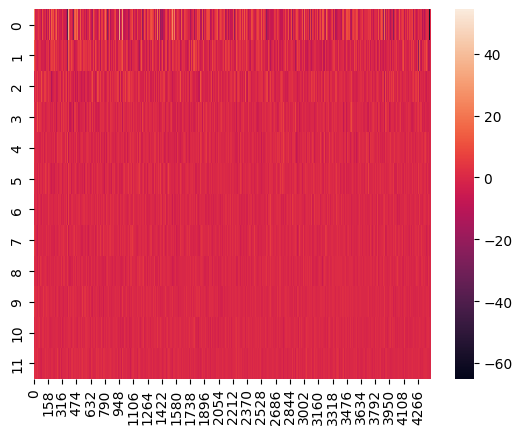

In [7]:
mfcc = librosa.feature.mfcc(y=audio, sr=sr, hop_length=8192, n_mfcc=12)
# pip install seaborn matplotlib
import seaborn as sns
from matplotlib import pyplot as plt
mfcc_delta = librosa.feature.delta(mfcc)
sns.heatmap(mfcc_delta)
plt.show()

Спектральный центроид (Spectral Centroid) является хорошим показателем яркости звука, широко используется в качестве автоматической меры музыкального тембра. То есть центроид показывает где расположен центр масс звука. В блюзовых композициях частоты распределены равномерно, в металле спектроид лежит ближе к концу спектра. 

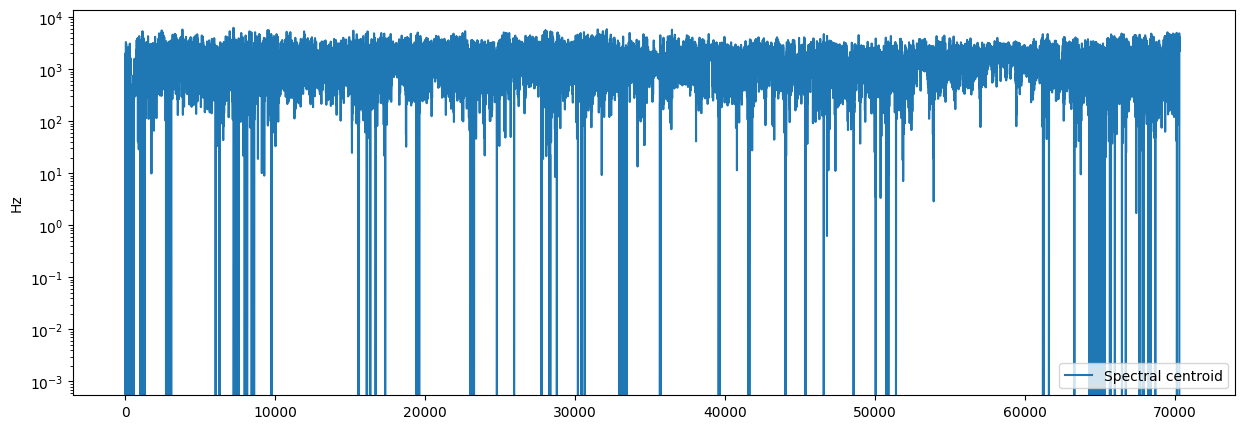

In [8]:
import numpy as np

cent = librosa.feature.spectral_centroid(y=audio, sr=sr)
cent_std = np.std(cent)
cent -= cent_std

plt.figure(figsize=(15,5))
plt.semilogy(cent.T, label='Spectral centroid')
plt.ylabel('Hz')
plt.legend()
plt.show()

Скорость пересечения нуля (Zero crossing Rate) является частотой изменения знака сигнала, то есть частота, с которой сигнал меняется с положительного на отрицательный и обратно. Например, для металла и рока этот параметр обычно выше, чем для других жанров, из-за большого количества ударных. 

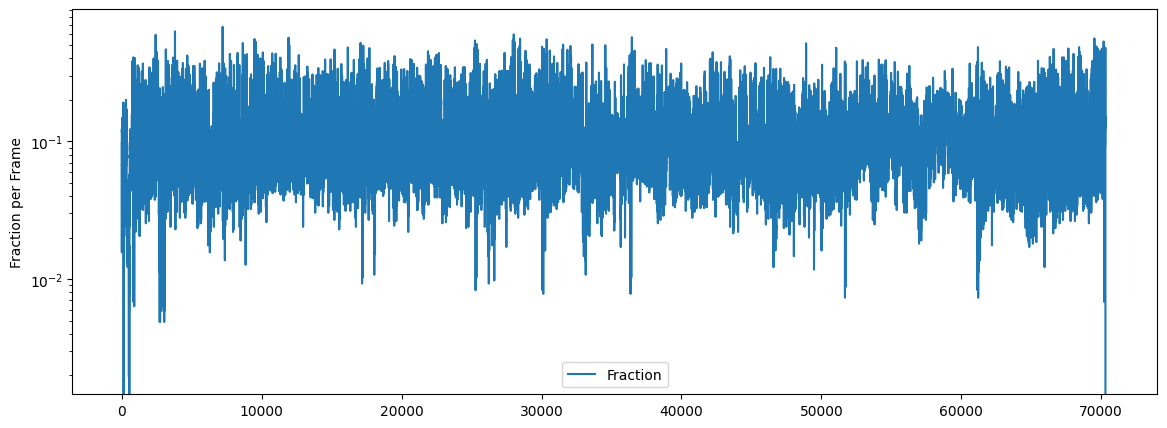

In [9]:
zrate=librosa.feature.zero_crossing_rate(audio)
plt.figure(figsize=(14,5))
plt.semilogy(zrate.T, label='Fraction')
plt.ylabel('Fraction per Frame')
plt.legend()
plt.show()

RMS (root mean square) — это инструмент измерения, который определяет среднюю громкость аудиодорожки в окне примерно 300 миллисекунд.

In [71]:
import librosa
video_path = '/Users/polinanazarova/Desktop/c4f416c793bb608fd8a5f4858ef825d1.mp4'
audio , sr = librosa.load(video_path)

/var/folders/2l/9ngbv0ln3bg2rcxscgv7604m0000gn/T/ipykernel_9059/866991575.py:3: UserWarning: PySoundFile failed. Trying audioread instead.
  audio , sr = librosa.load(video_path)


In [80]:
np.shape(audio)

(4206589,)

In [84]:
(4206589/sr/60 - 4206589/sr//60) * 0.6

0.1077501133786849

In [89]:
sr

22050

In [86]:
rms = librosa.feature.rms(y=audio)[0]

In [94]:
len(rms)

8216

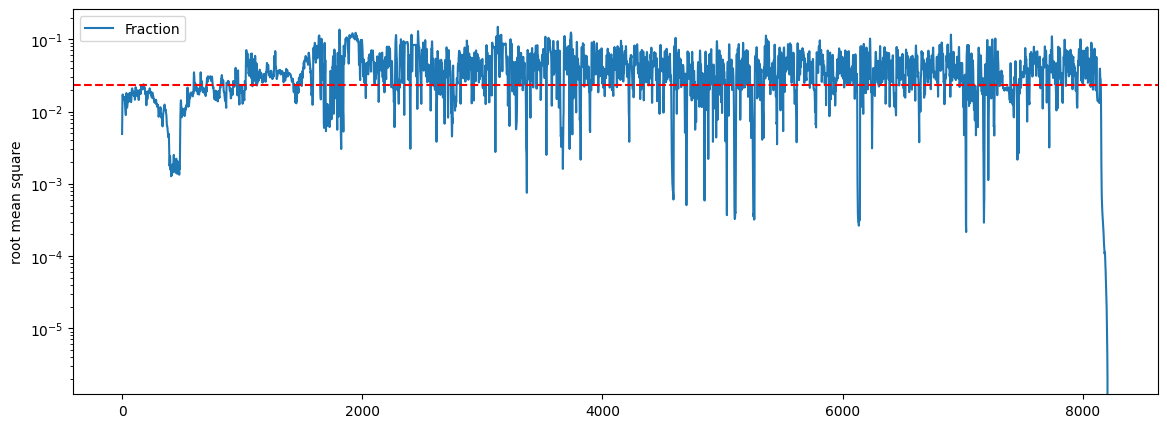

In [85]:
plt.figure(figsize=(14,5))
plt.semilogy(rms.T, label='Fraction')
plt.axhline(np.std(rms), color='r', linestyle='--')
plt.ylabel('root mean square')
plt.legend()
plt.show()

In [75]:
onset_env = librosa.onset.onset_strength(y=audio, sr=sr)

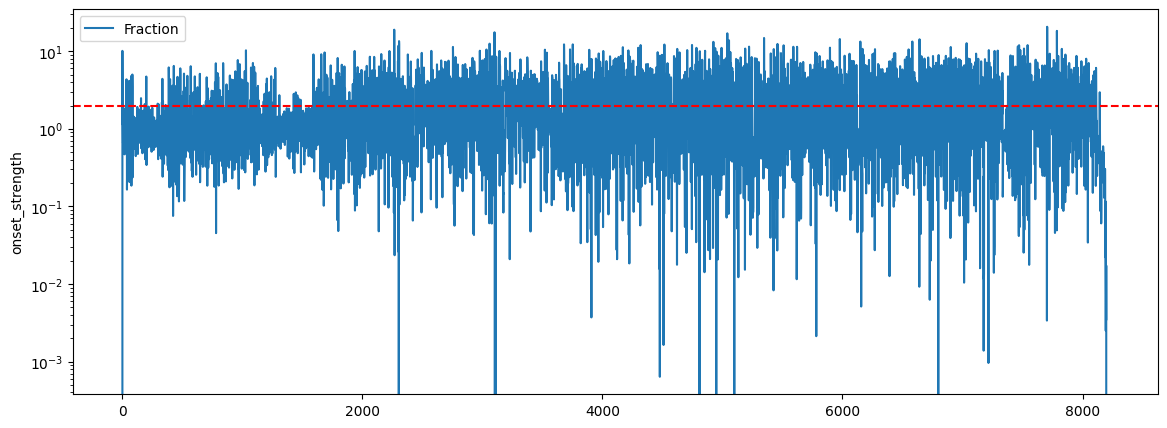

In [76]:
plt.figure(figsize=(14,5))
plt.semilogy(onset_env.T, label='Fraction')
plt.axhline(np.std(onset_env), color='r', linestyle='--')
plt.ylabel('onset_strength')
plt.legend()
plt.show()

In [95]:
peak_indices = np.where((onset_env > np.std(onset_env)) & (rms > np.std(rms)))[0]

In [96]:
peak_indices

array([ 596,  705,  706, ..., 8113, 8114, 8143])

In [97]:
len(peak_indices)

2603

In [98]:
peak_indices[:,None]

array([[ 596],
       [ 705],
       [ 706],
       ...,
       [8113],
       [8114],
       [8143]])

In [118]:
len(times)

8216

In [122]:
4206589/8216 * sr / 60

188159.86581061347

In [162]:
np.array(audio)

np.float32(1.1641532e-10)

In [219]:
import scipy
times = librosa.times_like(onset_env, sr=sr)
t = (1 * sr *len(times))/np.shape(audio)[0]
print(t)
clusters = scipy.cluster.hierarchy.fcluster(
    scipy.cluster.hierarchy.linkage(peak_indices[:, None], method='single'),
    t=t, criterion='distance')

43.06643696353506


In [220]:
set(clusters)

{np.int32(1),
 np.int32(2),
 np.int32(3),
 np.int32(4),
 np.int32(5),
 np.int32(6),
 np.int32(7),
 np.int32(8),
 np.int32(9)}

In [221]:
len(set(clusters))

9

In [222]:
segment_energies = []
for cluster_id in set(clusters):
    cluster_indices = peak_indices[clusters == cluster_id]
    segment_energy = np.sum(rms[cluster_indices])
    segment_energies.append((cluster_indices[0], segment_energy))

segment_energies.sort(key=lambda x: x[1], reverse=True)


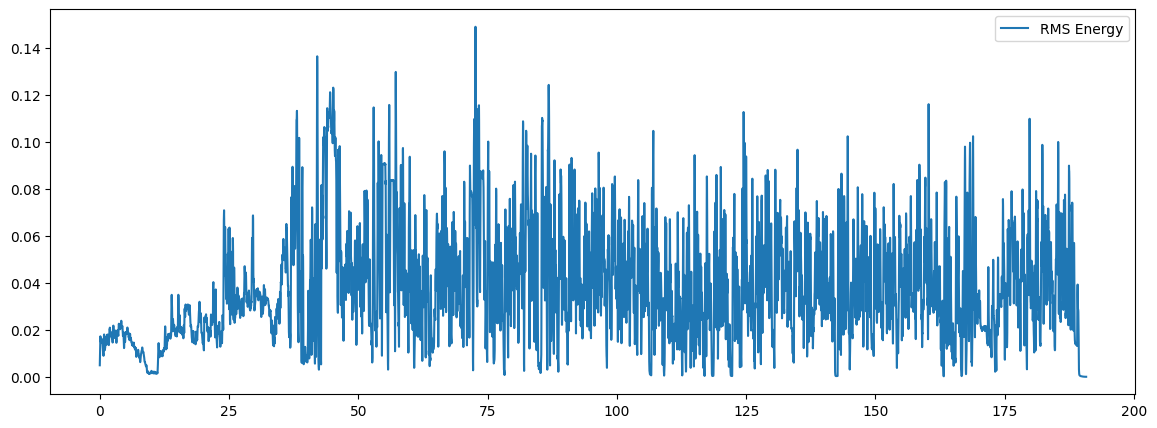

In [223]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.plot(times, rms, label='RMS Energy')
plt.legend()
plt.show()

In [224]:
times[-1]*sr/3600

np.float64(1168.3555555555556)

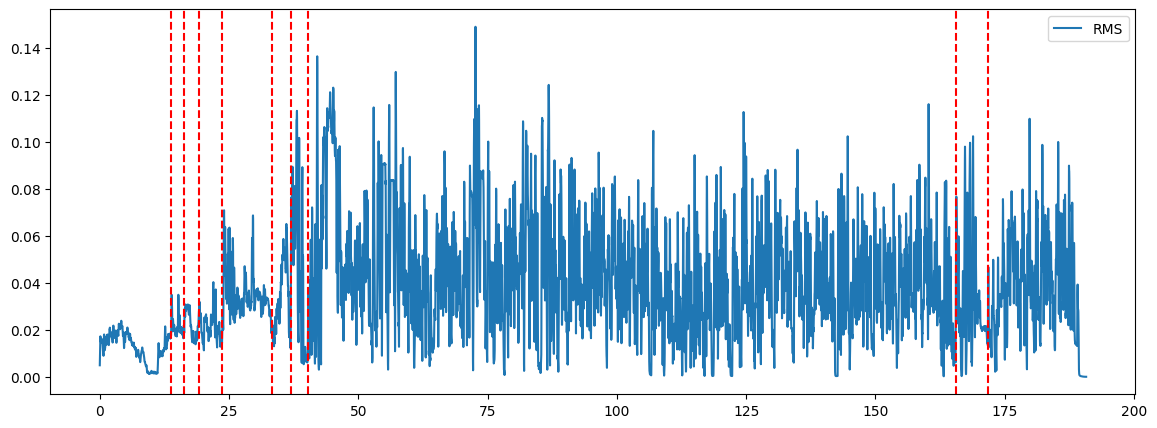

In [225]:
plt.figure(figsize=(14, 5))
plt.plot(times, rms, label='RMS')
for cluster_id in set(clusters):
    cluster_indices = peak_indices[clusters == cluster_id]
    plt.axvline(times[cluster_indices[0]], color='r', linestyle='--')
plt.legend()
plt.show()

In [226]:
segment_energies

[(np.int64(1735), np.float32(114.087265)),
 (np.int64(7399), np.float32(13.796878)),
 (np.int64(7131), np.float32(4.1762133)),
 (np.int64(1021), np.float32(2.3731987)),
 (np.int64(1591), np.float32(1.221559)),
 (np.int64(826), np.float32(0.54516506)),
 (np.int64(705), np.float32(0.23151502)),
 (np.int64(1433), np.float32(0.14338824)),
 (np.int64(596), np.float32(0.026746146))]

In [205]:
from IPython.display import Audio

audio_segment = audio
for start_idx, _ in segment_energies[:3]:  # Берем топ-3 сегмента
    start_time = round(times[start_idx] * sr)  # Переводим в миллисекунды
    if start_time<0: start_time=0
    end_time = start_time + 50000  # Например, берем 5-секундные сегменты
    segment = audio_segment[start_time:end_time]
Audio(segment, rate = sr)

In [58]:
len(clusters)

24161

In [236]:
from IPython.display import Audio

audio_segment = audio
start_idx = segment_energies[8][0]
start_time = round(times[start_idx] * sr)-50000  # Переводим в миллисекунды
if start_time<0: start_time=0
end_time = start_time + 50000  # Например, берем 5-секундные сегменты
segment = audio_segment[start_time:end_time]
Audio(segment, rate = sr)

In [13]:
def get_timecodes_of_peaks(video_path, seconds_between_grouped_peaks = 1):
    import librosa
    import scipy
    import numpy as np
    
    audio, sr = librosa.load(video_path)
    rms = librosa.feature.rms(y=audio)[0]
    onset_env = librosa.onset.onset_strength(y=audio, sr=sr)
    peak_indices = np.where((onset_env > np.mean(onset_env)) & (rms > np.mean(rms)))[0]
    
    times = librosa.times_like(onset_env, sr=sr)
    t = (seconds_between_grouped_peaks * sr *len(times))/np.shape(audio)[0]
    clusters = scipy.cluster.hierarchy.fcluster(
        scipy.cluster.hierarchy.linkage(peak_indices[:, None], method='single'),
        t=t, criterion='distance')

    segment_energies = []
    for cluster_id in set(clusters):
        cluster_indices = peak_indices[clusters == cluster_id]
        segment_energy = np.sum(rms[cluster_indices])
        segment_energies.append(((round(times[cluster_indices[0]] * sr),round(times[cluster_indices[-1]] * sr)), segment_energy))
    
    segment_energies.sort(key=lambda x: x[1], reverse=True)

    return segment_energies


video_path = '/Users/polinanazarova/Desktop/fcb009f177116d100e67f88f57006190.mp4'
timecodes = get_timecodes_of_peaks(video_path)

/var/folders/2l/9ngbv0ln3bg2rcxscgv7604m0000gn/T/ipykernel_14966/166082248.py:6: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(video_path)


In [14]:
timecodes

[((4395008, 5918720), np.float32(60.057938)),
 ((1851904, 3055104), np.float32(51.361763)),
 ((423424, 1339904), np.float32(43.298332)),
 ((25298944, 26088960), np.float32(41.790707)),
 ((15500800, 16056320), np.float32(31.271015)),
 ((31867392, 32254464), np.float32(26.480532)),
 ((23468544, 24183296), np.float32(25.14891)),
 ((19331072, 19928064), np.float32(24.272808)),
 ((8655872, 9103872), np.float32(23.017113)),
 ((6184448, 6721536), np.float32(22.37255)),
 ((32775168, 33215488), np.float32(21.887987)),
 ((10990080, 11549184), np.float32(21.101269)),
 ((20051456, 20670464), np.float32(20.670826)),
 ((22838272, 23292928), np.float32(19.698849)),
 ((24658432, 24928256), np.float32(17.12884)),
 ((3209216, 3592192), np.float32(17.063498)),
 ((9332736, 9908224), np.float32(16.329453)),
 ((14082560, 14404608), np.float32(15.851001)),
 ((14483968, 14855168), np.float32(15.386088)),
 ((21584384, 21929984), np.float32(15.120011)),
 ((6816768, 7228928), np.float32(15.041804)),
 ((30758912,

In [6]:
from IPython.display import Audio
import librosa
import numpy as np

audio, sr = librosa.load(video_path)
powerful_segments = []
border_seconds = 1
border_ticks = border_seconds * sr

for timecode, _ in timecodes:  # Берем топ-3 сегмента
    start_time = timecode[0] 
    end_time = timecode[1]
    print(start_time,end_time)
    
    if (start_time - border_ticks >= 0): start_time-=border_ticks
    else: start_time=0
    if (end_time + border_ticks <= np.shape(audio)[0]): end_time+=border_ticks
    else: end_time=np.shape(audio)[0]
        
    powerful_segments.append(audio[start_time:end_time])
    
Audio(powerful_segments[0], rate = sr)

/var/folders/2l/9ngbv0ln3bg2rcxscgv7604m0000gn/T/ipykernel_14966/800219222.py:5: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(video_path)


4395008 5918720
1851904 3055104
423424 1339904
25298944 26088960
15500800 16056320
31867392 32254464
23468544 24183296
19331072 19928064
8655872 9103872
6184448 6721536
32775168 33215488
10990080 11549184
20051456 20670464
22838272 23292928
24658432 24928256
3209216 3592192
9332736 9908224
14082560 14404608
14483968 14855168
21584384 21929984
6816768 7228928
30758912 31062528
12608512 12948480
26226176 26448384
10065920 10476544
3777536 4197888
34995712 35516928
32539648 32750080
18667520 19107840
8007168 8297472
1603072 1825280
22405632 22626816
12975104 13374976
11975680 12310016
26660352 26932736
18415616 18587136
22096896 22351360
20800512 20968448
7784960 7983104
33923584 34268160
34303488 34670592
19138048 19305984
27560448 27838976
31089664 31252992
28745216 28965888
34715136 34971136
8334848 8518144
30508544 30716928
35693056 35912704
22654464 22796800
13879296 14057984
27398144 27537920
20993536 21183488
21385728 21543936
12412416 12569600
17371648 17665024
27876352 28052480
2

In [10]:
len(powerful_segments)

188

In [12]:
Audio(powerful_segments[140], rate = sr)

In [271]:
with open('/Users/polinanazarova/Desktop/test2.wav', 'wb') as f:
    f.write(powerful_segments[4])